I am doing Descriptive statistics on the Amazon dataset which provides detailed insights into Amazon sales data, including SKU Code, Design Number, Stock, Category, Size, and Color, to help optimize product profitability.

Below i will display the uncleaned version and a few first rows of the data.

#Please install the Libraries below if they are not installed on your system
pip install numpy pandas matplotlib seaborn scipy

In [ ]:
Github Link

https://github.com/nattytechlab/Descriptive-Statistics/blob/5372ada88ba6166c72b3ef0ebbf22443ba60e382/Data%20Assignment.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

data = pd.read_csv('/Users/nattytechsa/Desktop/Data_Assignment/Amazon_Sale_Report.csv', low_memory=False)

data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


Below i will display the uncleaned version and a last first rows of the data.

In [2]:
data.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128974,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


The code below Displays the Basic information about the amazon_sale_report dataset

In [3]:
print("Original data info:")
print(data.info())

Original data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount        

The code below displays how I cleaned my data:
- I dropped missing values in columns
- Sum of all missing values
- Changed the datatype for ship to postal to int
- changed the date format
- Save cleaned data into a new CSV file.

In [4]:
data.drop(['Unnamed: 22'], axis=1, inplace=True)

In [5]:
pd.isnull(data).sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data["ship-postal-code"]=data["ship-postal-code"].astype("int")

In [8]:
data["Date"] = pd.to_datetime(data["Date"], format= "%m-%d-%y" , errors="coerce" , exact=False)

In [9]:
data.to_csv("Cleaned_Data.csv", index=False)

data_Cleaned = pd.read_csv('/Users/nattytechsa/Desktop/Data_Assignment/Cleaned_Data.csv', low_memory=False)

print("\ncleaned_Data info:")
print(data_Cleaned.info())


cleaned_Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32338 entries, 0 to 32337
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               32338 non-null  int64  
 1   Order ID            32338 non-null  object 
 2   Date                32338 non-null  object 
 3   Status              32338 non-null  object 
 4   Fulfilment          32338 non-null  object 
 5   Sales Channel       32338 non-null  object 
 6   ship-service-level  32338 non-null  object 
 7   Style               32338 non-null  object 
 8   SKU                 32338 non-null  object 
 9   Category            32338 non-null  object 
 10  Size                32338 non-null  object 
 11  ASIN                32338 non-null  object 
 12  Courier Status      32338 non-null  object 
 13  Qty                 32338 non-null  int64  
 14  currency            32338 non-null  object 
 15  Amount              32338 non-nul

Displaying New cleaned data:
- first few rows
- last few rows

In [10]:
data_Cleaned.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.0,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
1,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,1,INR,399.0,HYDERABAD,TELANGANA,500032,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-XS,kurta,...,1,INR,399.0,Amravati.,MAHARASHTRA,444606,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
3,14,408-1298370-1920302,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0351,J0351-SET-L,Set,...,1,INR,771.0,MUMBAI,MAHARASHTRA,400053,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
4,15,403-4965581-9520319,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,PJNE3368,PJNE3368-KR-6XL,kurta,...,1,INR,544.0,GUNTAKAL,ANDHRA PRADESH,515801,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship


In [11]:
data_Cleaned.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
32333,128872,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0243,J0243-DR-S,Ethnic Dress,...,1,INR,999.0,ALLUR,ANDHRA PRADESH,524315,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
32334,128873,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0079,J0079-SKD-S,Set,...,1,INR,1523.0,ALLUR,ANDHRA PRADESH,524315,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
32335,128874,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0009,J0009-SKD-S,Set,...,1,INR,854.0,ALLUR,ANDHRA PRADESH,524315,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
32336,128887,405-6493630-8542756,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0301,J0301-TP-M,Top,...,1,INR,518.0,NOIDA,UTTAR PRADESH,201301,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
32337,128891,403-0317423-9322704,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3869,JNE3869-DR-M,Western Dress,...,1,INR,721.0,UTTAR BAGDOGRA,WEST BENGAL,734014,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship


Descriptive Statistics for Numeric Columns

Measures of Central Tendency:
- Mean
- Median
- Mode

In [12]:
numeric_columns = data_Cleaned.select_dtypes(include=['int64', 'float64'])

for column in numeric_columns.columns:
    descriptive_stats = numeric_columns[column].describe()
    
    print(f"Descriptive statistics for column '{column}':")
    print(f"Count: {descriptive_stats['count']}")
    print(f"Mean: {descriptive_stats['mean']}")
    print(f"Median: {descriptive_stats['50%']}")
    print(f"Mode: {numeric_columns[column].mode().iloc[0]}","\n" )

Descriptive statistics for column 'index':
Count: 32338.0
Mean: 60920.64917434597
Median: 63419.0
Mode: 1 

Descriptive statistics for column 'Qty':
Count: 32338.0
Mean: 1.004854969385862
Median: 1.0
Mode: 1 

Descriptive statistics for column 'Amount':
Count: 32338.0
Mean: 651.2859793431876
Median: 631.0
Mode: 771.0 

Descriptive statistics for column 'ship-postal-code':
Count: 32338.0
Mean: 462118.51601830666
Median: 500018.0
Mode: 201301 



Measures of Despersion or Variation:
- Range
- Variance
- Standard Deviation
- Interquartile(IQR)

In [13]:
print(f"Range: \n{numeric_columns.apply(lambda x: x.max() - x.min())}","\n")
for column in numeric_columns.columns:
    descriptive_stats = numeric_columns[column].describe()
    
    print(f"Descriptive statistics for column '{column}':")
    print(f"Variance: {numeric_columns[column].var()}")
    print(f"Standard Deviation: {numeric_columns[column].std()}")
    print(f"Standard Variation: {numeric_columns[column].std() ** 2}")
    print(f"Interquartile Range (IQR): {numeric_columns[column].quantile(0.25) - numeric_columns[column].quantile(0.75)}","\n")

Range: 
index               128890.0
Qty                      4.0
Amount                5495.0
ship-postal-code    745114.0
dtype: float64 

Descriptive statistics for column 'index':
Variance: 1357901292.0824716
Standard Deviation: 36849.712238801425
Standard Variation: 1357901292.0824716
Interquartile Range (IQR): -64597.75 

Descriptive statistics for column 'Qty':
Variance: 0.007243645663061497
Standard Deviation: 0.08510960969867913
Standard Variation: 0.007243645663061497
Interquartile Range (IQR): 0.0 

Descriptive statistics for column 'Amount':
Variance: 80796.52315499377
Standard Deviation: 284.24729225622144
Standard Variation: 80796.52315499376
Interquartile Range (IQR): -312.0 

Descriptive statistics for column 'ship-postal-code':
Variance: 37751650102.42869
Standard Deviation: 194297.83864579833
Standard Variation: 37751650102.42868
Interquartile Range (IQR): -230036.0 



Measures of Distribution Shape:
- Skewness
- kurtosis

In [14]:
for column in numeric_columns.columns:
    descriptive_stats = numeric_columns[column].describe()
    print(f"Descriptive statistics for column '{column}':")
    
    print(f"Skewness: {numeric_columns[column].skew()}")
    print(f"Kurtosis: {numeric_columns[column].kurtosis()}","\n")

Descriptive statistics for column 'index':
Skewness: 0.07030612676404581
Kurtosis: -1.170628986022012 

Descriptive statistics for column 'Qty':
Skewness: 23.054560635830896
Kurtosis: 689.0697007095962 

Descriptive statistics for column 'Amount':
Skewness: 0.8790476193910451
Kurtosis: 4.192764499698427 

Descriptive statistics for column 'ship-postal-code':
Skewness: -0.2076402837669597
Kurtosis: -0.7487783887710924 



Percentiles:
- Quartiles
- Deciles
- Percentiles
- Min & Max

In [15]:
for column in numeric_columns.columns:
    descriptive_stats = numeric_columns[column].describe()
    
    print(f"Descriptive statistics for column '{column}':")
    print(f"Minimum: {descriptive_stats['min']}")
    print(f"25th Percentile (Q1): {numeric_columns[column].quantile(0.25)}")
    print(f"IQR Percentile (Q1): {numeric_columns[column].quantile(0.75) - numeric_columns[column].quantile(0.25)}")
    print(f"75th Percentile (Q3): {numeric_columns[column].quantile(0.75)}")
    print(f"Maximum: {descriptive_stats['max']}","\n")

print(f"Percentiles:\n{numeric_columns.quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99])}" )
print(f"deciles:\n{numeric_columns.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}")

Descriptive statistics for column 'index':
Minimum: 1.0
25th Percentile (Q1): 27157.0
IQR Percentile (Q1): 64597.75
75th Percentile (Q3): 91754.75
Maximum: 128891.0 

Descriptive statistics for column 'Qty':
Minimum: 1.0
25th Percentile (Q1): 1.0
IQR Percentile (Q1): 0.0
75th Percentile (Q3): 1.0
Maximum: 5.0 

Descriptive statistics for column 'Amount':
Minimum: 0.0
25th Percentile (Q1): 459.0
IQR Percentile (Q1): 312.0
75th Percentile (Q3): 771.0
Maximum: 5495.0 

Descriptive statistics for column 'ship-postal-code':
Minimum: 110001.0
25th Percentile (Q1): 370001.0
IQR Percentile (Q1): 230036.0
75th Percentile (Q3): 600037.0
Maximum: 855115.0 

Percentiles:
          index  Qty  Amount  ship-postal-code
0.01    1939.48  1.0     0.0         110018.00
0.05    5975.85  1.0   301.0         110091.85
0.25   27157.00  1.0   459.0         370001.00
0.50   63419.00  1.0   631.0         500018.00
0.75   91754.75  1.0   771.0         600037.00
0.95  120841.15  1.0  1186.0         781022.00
0.9

Relative Measures of Dispersion:
- Coefficient of Variation

In [16]:
print(f"Coefficient of Variation: \n{(numeric_columns.std() / numeric_columns.mean()) * 100}")

Coefficient of Variation: 
index               60.488049
Qty                  8.469840
Amount              43.644006
ship-postal-code    42.045023
dtype: float64


Measures of Relationship:
- Correlation Coefficient
- Covariance

In [17]:
print(f"Correlation with other columns: \n{numeric_columns.corr()}")
print(f"Covariance Matrix: \n{numeric_columns.cov()}")

Correlation with other columns: 
                     index       Qty    Amount  ship-postal-code
index             1.000000  0.001271  0.090802          0.023857
Qty               0.001271  1.000000  0.175958         -0.005277
Amount            0.090802  0.175958  1.000000         -0.035402
ship-postal-code  0.023857 -0.005277 -0.035402          1.000000
Covariance Matrix: 
                         index        Qty        Amount  ship-postal-code
index             1.357901e+09   3.985777  9.510950e+05      1.708112e+08
Qty               3.985777e+00   0.007244  4.256799e+00     -8.726920e+01
Amount            9.510950e+05   4.256799  8.079652e+04     -1.955205e+06
ship-postal-code  1.708112e+08 -87.269197 -1.955205e+06      3.775165e+10


Frequesncy Distribution:
- Histogram
- Frequency Tables

  Frequency Histogram Tables for Numeric Columns

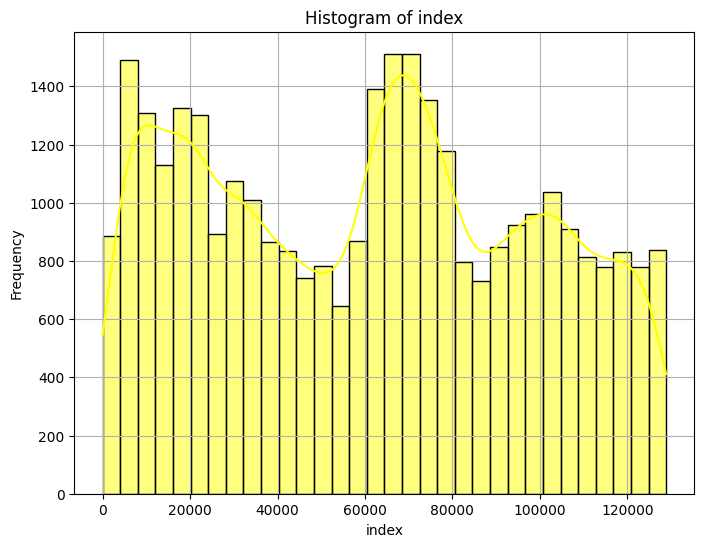

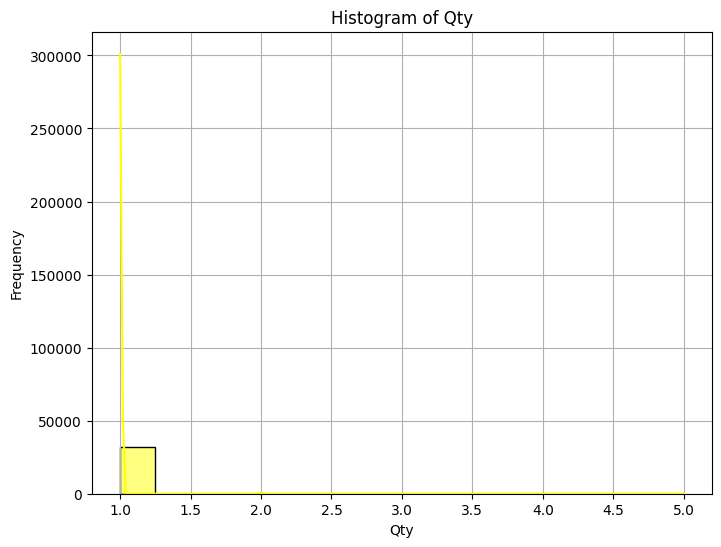

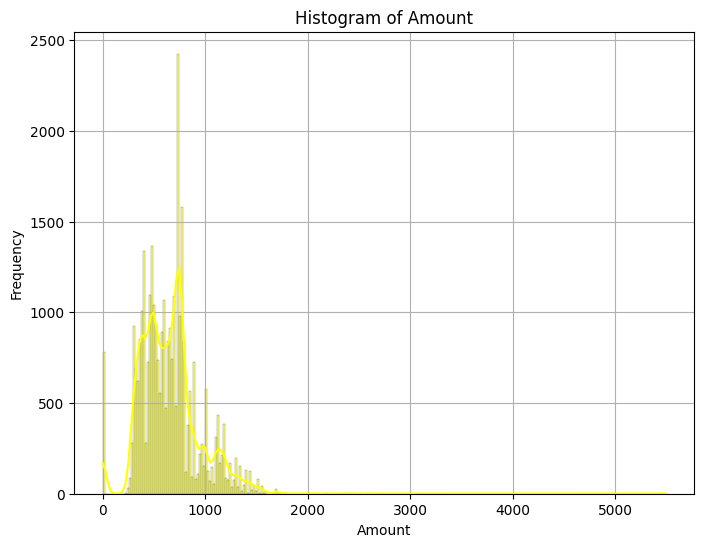

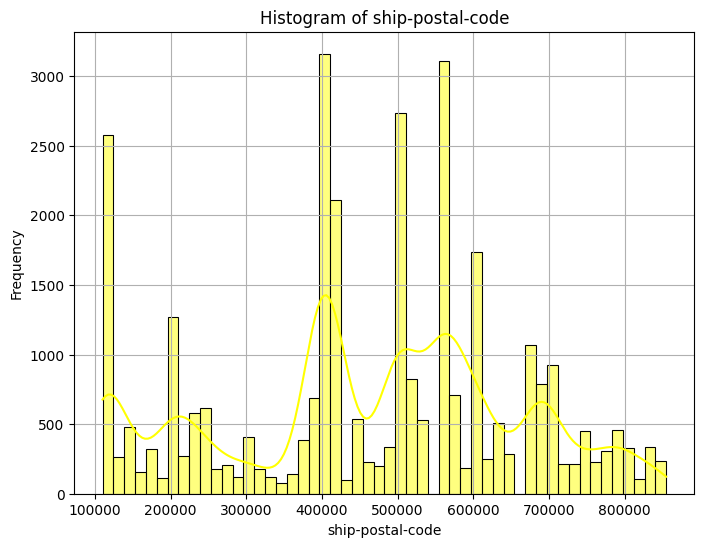

In [18]:
for column in numeric_columns.columns:
    descriptive_stats = numeric_columns[column].describe()
    plt.figure(figsize=(8, 6))
    sns.histplot(numeric_columns[column], bins='auto', kde=True, color='yellow')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show(),"\n*2"

frequencies for all columns excluding Promotion-ids because it has sentences and it fills the screen when i run it.

In [19]:
column_to_exclude = 'promotion-ids'

frequency_tables = {}
for column in data_Cleaned.columns:
     if column != column_to_exclude:
        # Create a frequency table for the current column
        frequency_tables[column] = data_Cleaned[column].value_counts()
    
for column, freq_table in frequency_tables.items():
    print(f"Frequency Table for {column}:")
    print(freq_table)
    print()

Frequency Table for index:
index
1         1
78787     1
78811     1
78808     1
78807     1
         ..
38092     1
38090     1
38087     1
38078     1
128891    1
Name: count, Length: 32338, dtype: int64

Frequency Table for Order ID:
Order ID
404-9932919-6662730    11
403-0173977-3041148    11
408-3317403-1729937    10
406-9002076-4152331     9
171-0706521-2133101     9
                       ..
402-3506010-3097960     1
408-1981246-7577134     1
403-9797794-9908335     1
403-9327150-6986732     1
403-0317423-9322704     1
Name: count, Length: 29927, dtype: int64

Frequency Table for Date:
Date
2022-04-20    603
2022-04-25    603
2022-04-24    602
2022-04-19    573
2022-04-26    566
             ... 
2022-06-25    210
2022-05-27    206
2022-05-26    191
2022-06-29    182
2022-03-31     17
Name: count, Length: 91, dtype: int64

Frequency Table for Status:
Status
Shipped - Delivered to Buyer     28724
Shipped - Returned to Seller      1946
Shipped - Picked Up                971
Pendin

Graphical Presentation:
- Box Plot of all numeric columns

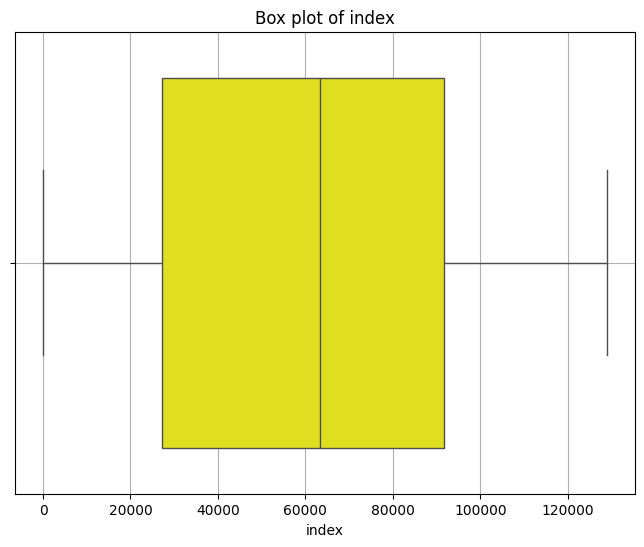

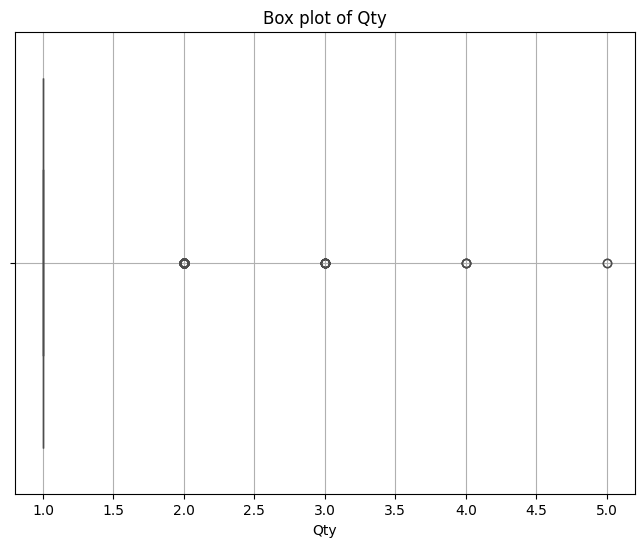

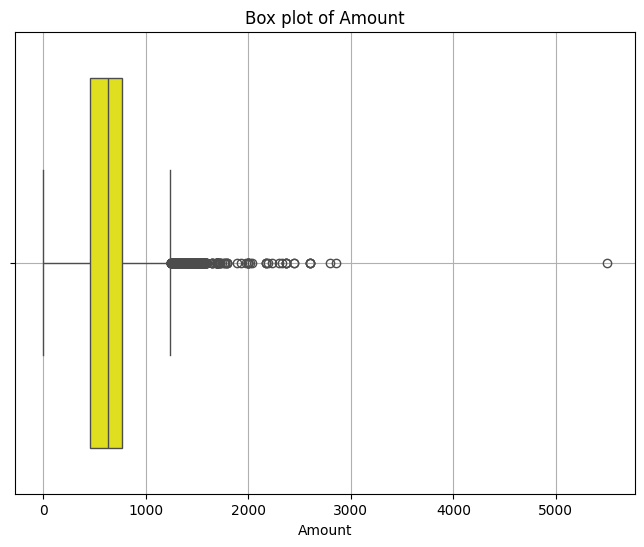

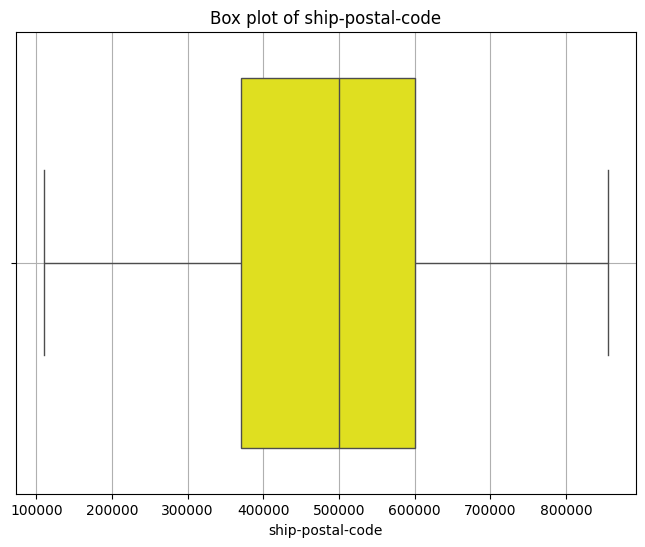

In [20]:
for column in numeric_columns.columns:
    descriptive_stats = numeric_columns[column].describe()
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=numeric_columns[column], color='yellow')
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.grid(True)
    plt.show()


Graphical Presentation:
- Scatter Plot for all the numeric columns against each other.

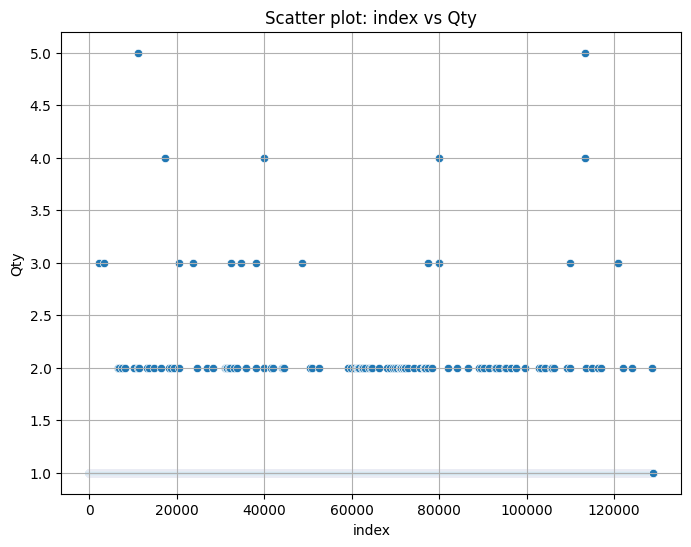

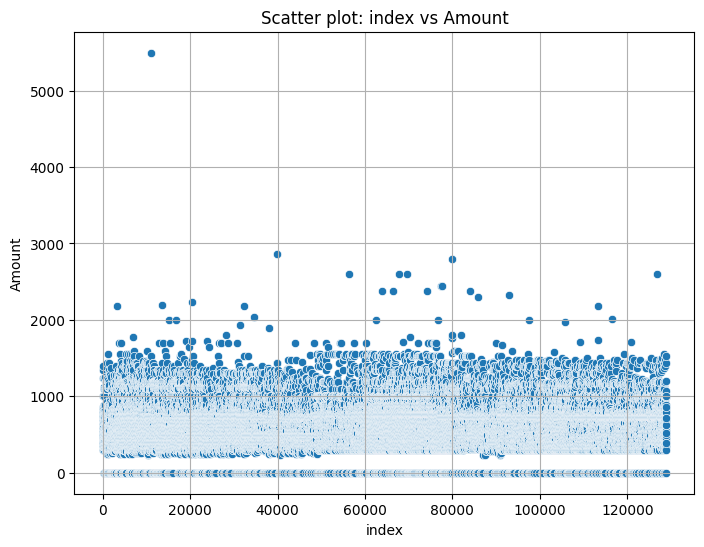

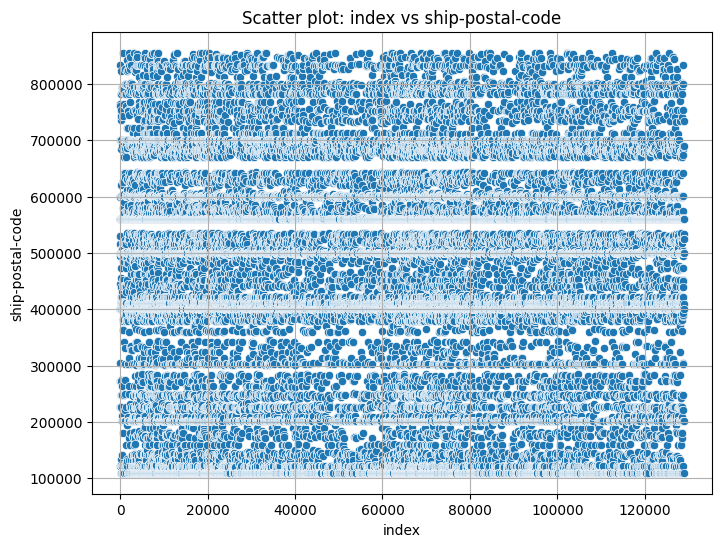

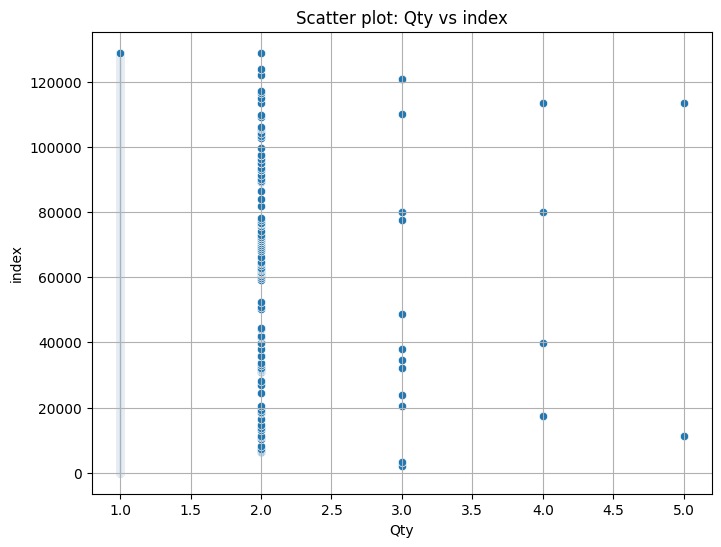

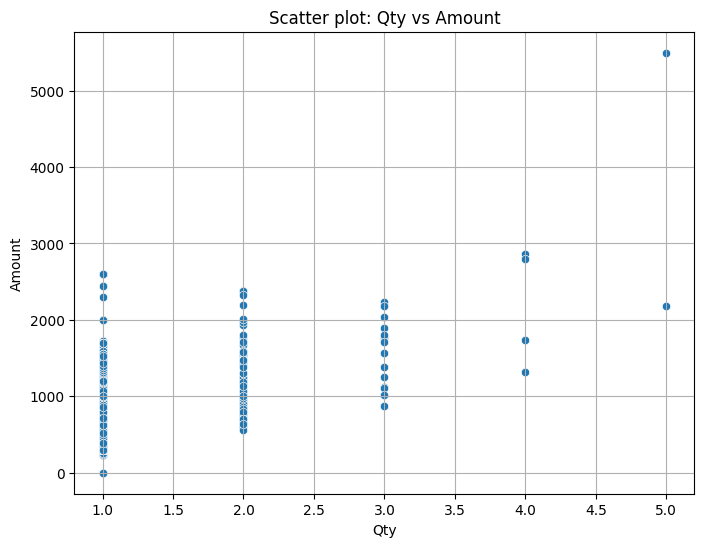

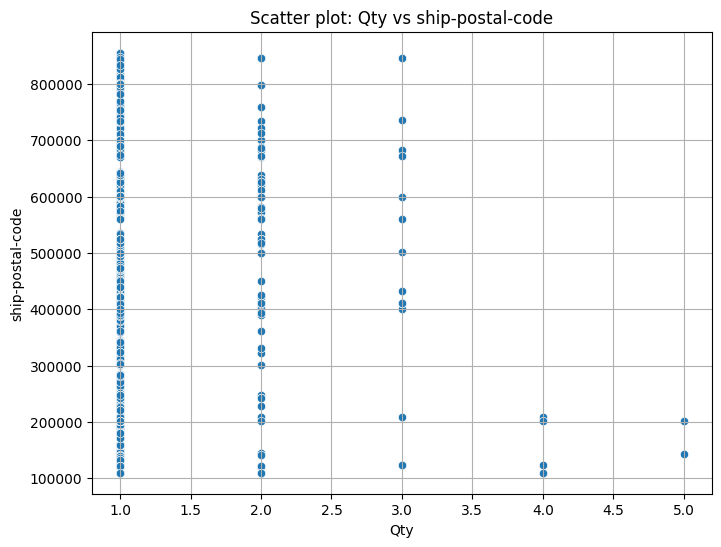

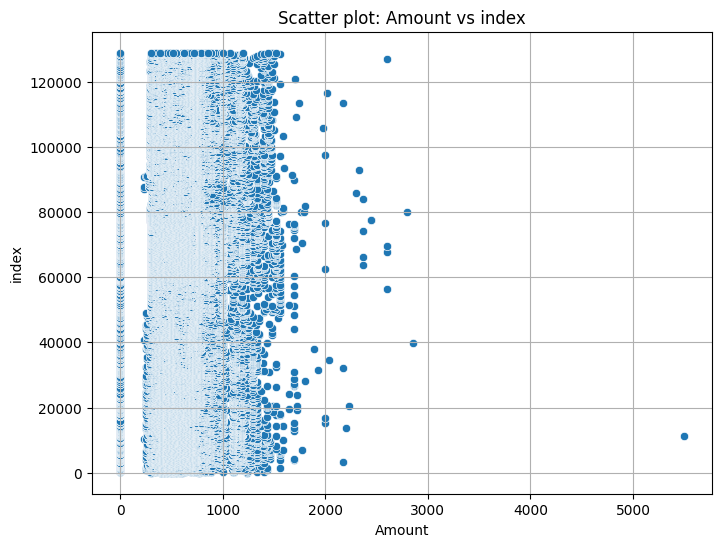

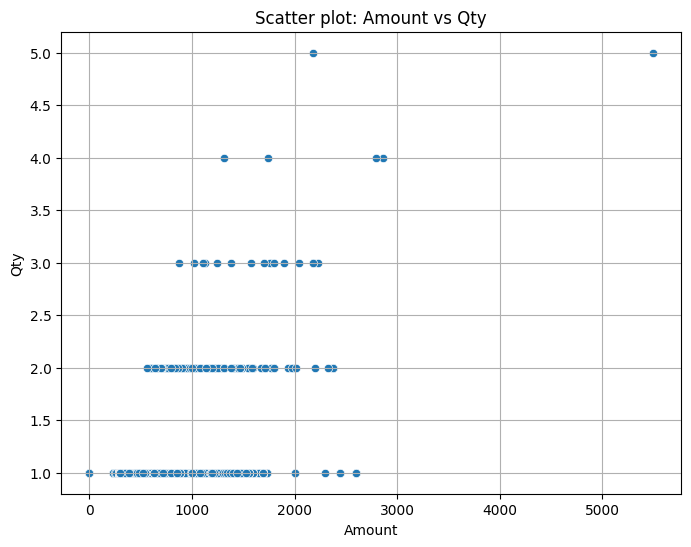

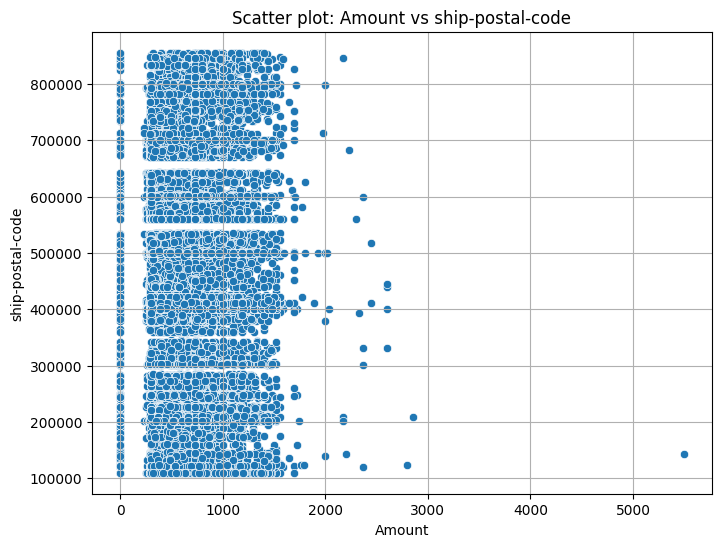

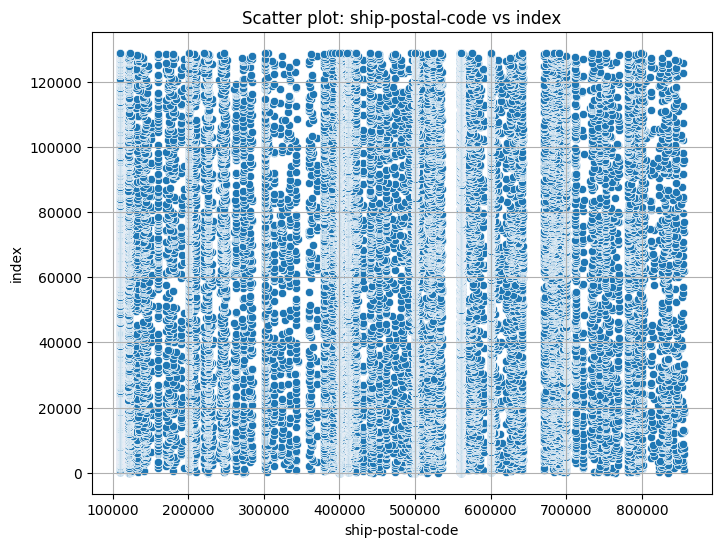

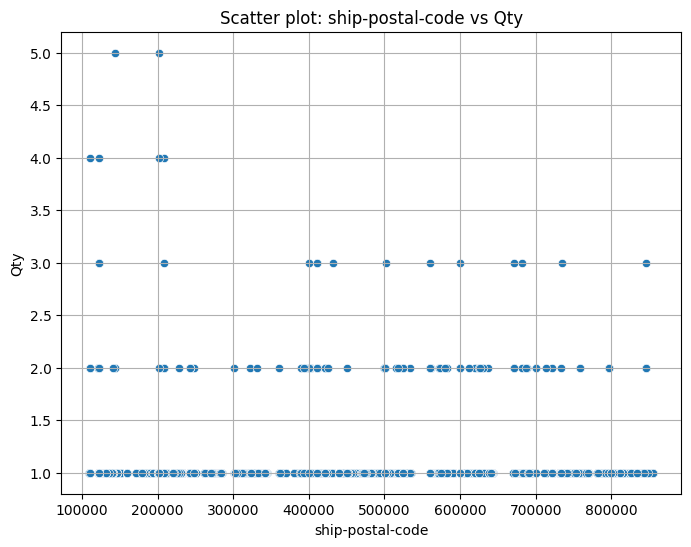

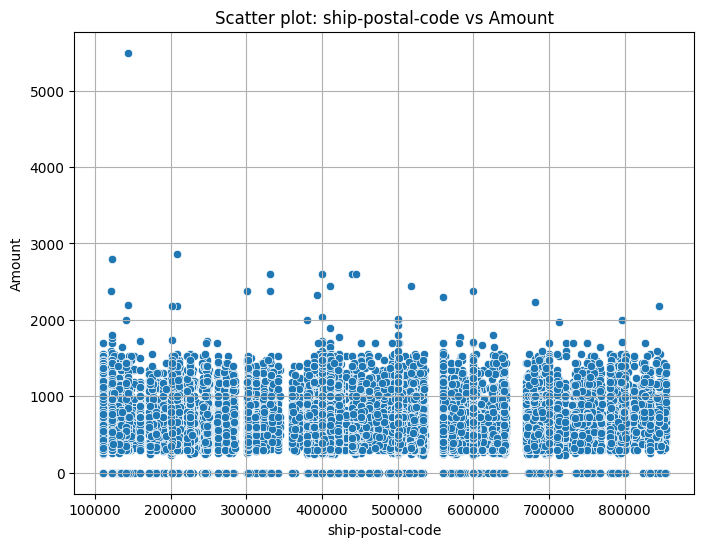

In [21]:
for column in numeric_columns.columns:
    descriptive_stats = numeric_columns[column].describe()
    for col in numeric_columns.columns:
        if col != column:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=column, y=col, data=numeric_columns)
            plt.title(f'Scatter plot: {column} vs {col}')
            plt.xlabel(column)
            plt.ylabel(col)
            plt.grid(True)
            plt.show()

Graphical Presentation:
- Bar graph showing the number of purchased product sizes.

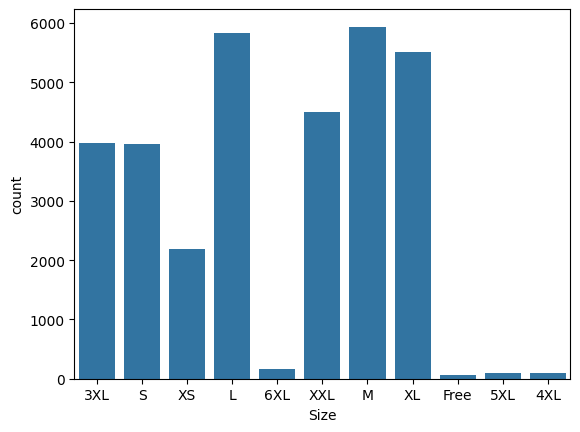

In [22]:
ax=sns.countplot(x='Size' ,data=data_Cleaned)

Graphical Presentation: 
- The Histogram shows the number or sizes bought based on their size types

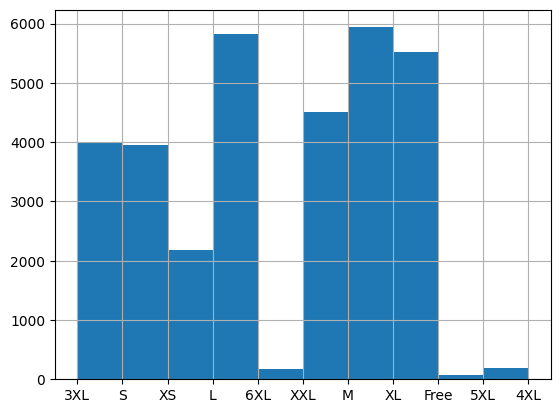

In [23]:
data_Cleaned['Size'].hist() 
plt.show()

The table below shows the Qty or Quantity of sizes purchased based on their size type

In [24]:
data_Cleaned.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

,Size,Qty
6,M,5971
5,L,5858
8,XL,5539
10,XXL,4520
0,3XL,4004
7,S,3970
9,XS,2193
3,6XL,170
2,5XL,104
1,4XL,93


Graphical Presentation:
- bar graph showing the number or quantity of sizes bought from Amazon

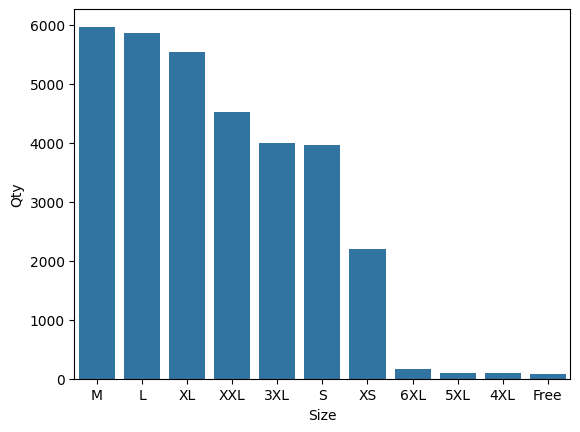

In [25]:
S_Qty=data_Cleaned.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)
sns.barplot(x='Size',y='Qty', data=S_Qty)
plt.show()

Graphical Presentation:
- The graph below shows number or the count of products shipment statuses baseson the Couriers

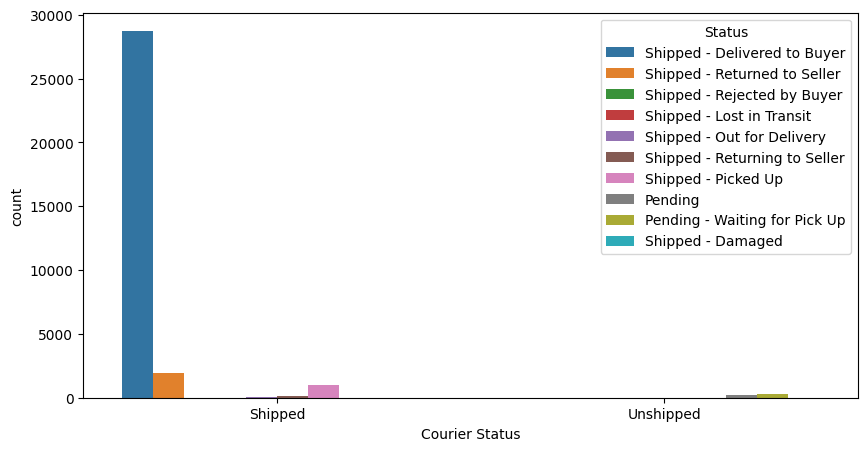

In [26]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=data_Cleaned, x='Courier Status',hue= 'Status')
plt.show()

Graphical Presentation: 
- the graph show the number of products purchased based on the product category

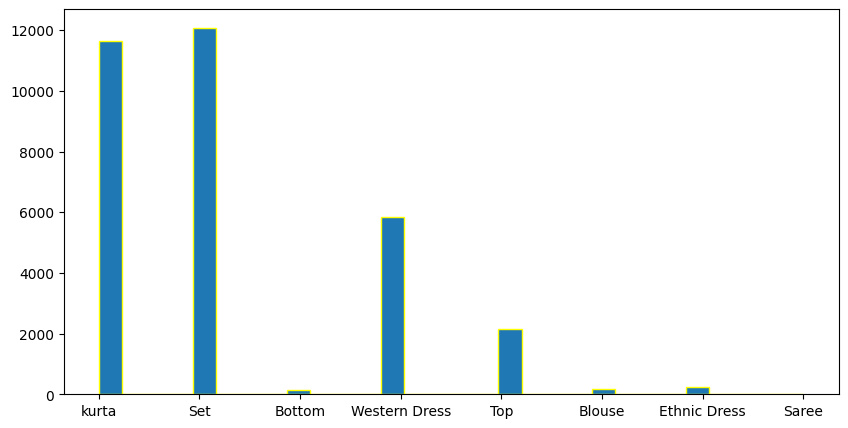

In [27]:
data_Cleaned['Category'] = data_Cleaned['Category'].astype(str)
column_data = data_Cleaned['Category']
plt.figure(figsize=(10, 5))
plt.hist(column_data, bins=30, edgecolor='yellow')
plt.show()

Graphical Presentation: 
- This graph shows the count of products distributed or bought by certain states

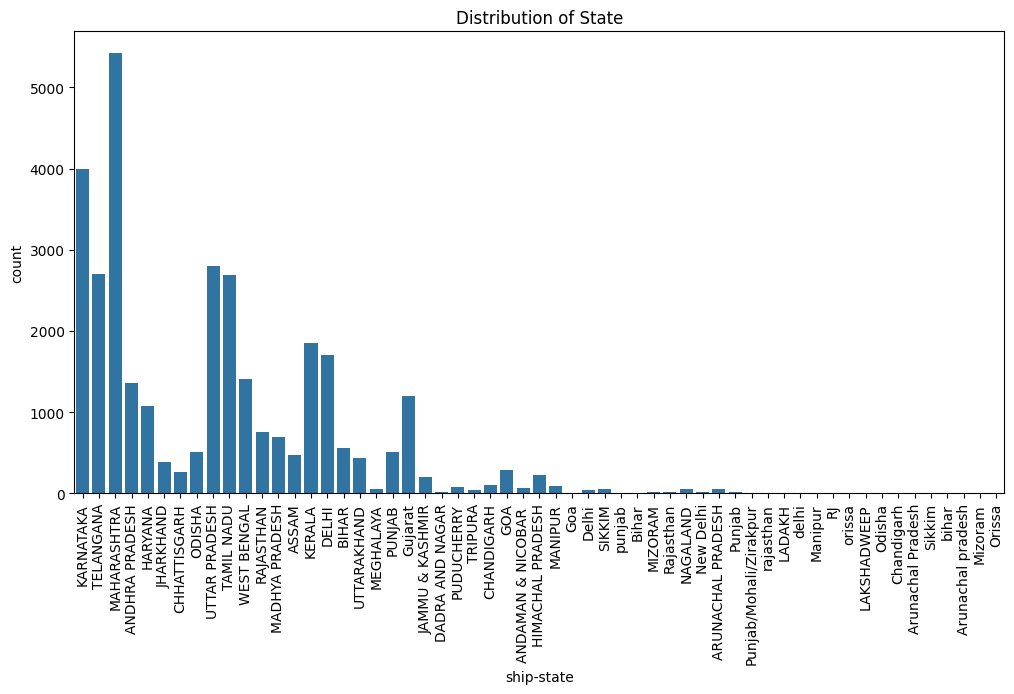

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_Cleaned, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

Graphical Presentation: 
- The graph below shows the top 10 states based on the distributiion count

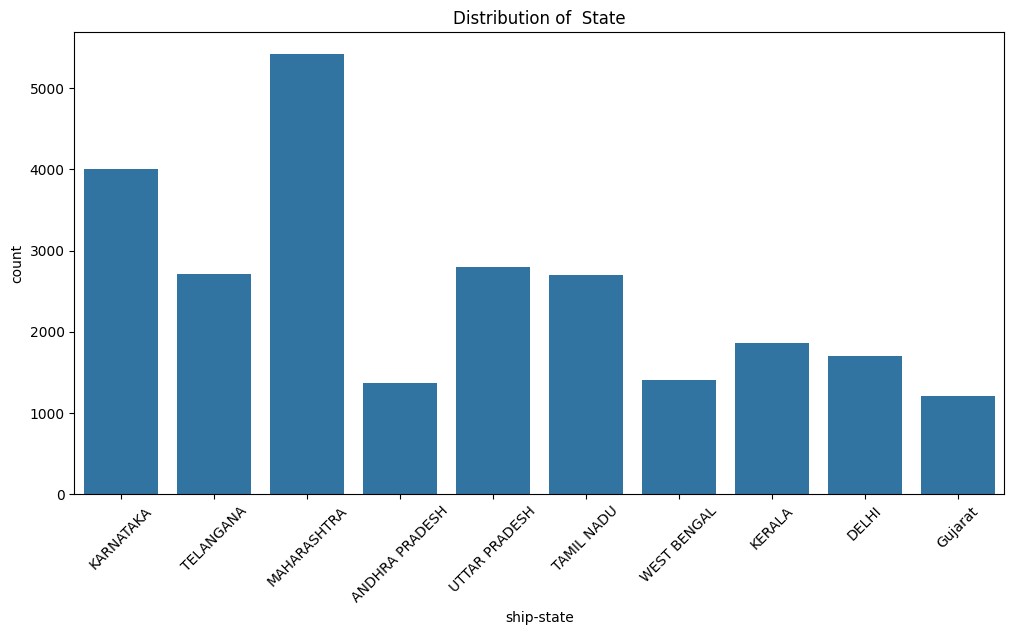

In [29]:
top_10_state = data_Cleaned['ship-state'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.countplot(data=data_Cleaned[data_Cleaned['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=45)
plt.show()

CONCLUSION
- Based on the analysis i have done it shows that there are more Amazon Buyers preffering an M-Medium size and there are less people preffering the free size.
- The analyses also shows that more products are shipped or delivered to the buyers
- The buyers choses Kurta products or amazon products most and they dont choose or like saree
- More buyers are coming from the MAHARASHTRA state.
